# Billboard Hot 100 Exploratory Data Analysis

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

The purpose of this is to perform exploratory data analysis on the billboard hot 100 data. The hot 100 dataset was obtained from Sean Miller from dataworld (Source: https://data.world/kcmillersean/billboard-hot-100-1958-2017)

In [27]:
billboard = pd.read_csv('hot100.csv')
billboard

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...,...,...
327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13


## Data Cleaning

In [28]:
hot_100 = billboard.drop(columns  = ['url', 'SongID']) #drop unnecessary and repetitive columns
hot_100

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,7/17/1965,34,Don't Just Stand There,Patty Duke,1,45.0,34,4
1,7/24/1965,22,Don't Just Stand There,Patty Duke,1,34.0,22,5
2,7/31/1965,14,Don't Just Stand There,Patty Duke,1,22.0,14,6
3,8/7/1965,10,Don't Just Stand There,Patty Duke,1,14.0,10,7
4,8/14/1965,8,Don't Just Stand There,Patty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...
327890,10/20/2018,22,God Is A Woman,Ariana Grande,1,21.0,8,13
327891,5/21/1977,22,I Wanna Get Next To You,Rose Royce,1,10.0,10,13
327892,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,1,12.0,10,13
327893,9/29/1973,22,Here I Am Come & Take Me,Al Green,1,16.0,10,13


In [29]:
split_col = hot_100['WeekID'].str.split('/', expand = True) #split the dates and create columns for the month, day and year
split_col
rename_col = split_col.rename(columns = {0: 'Month', 1:'Day', 2:'Year'}) #rename the columns
rename_col

,Month,Day,Year
0,7,17,1965
1,7,24,1965
2,7,31,1965
3,8,7,1965
4,8,14,1965
...,...,...,...
327890,10,20,2018
327891,5,21,1977
327892,5,23,1981
327893,9,29,1973


In [30]:
hot_100['Month'] = rename_col['Month'] #Include columns in original dataframe
hot_100['Day'] = rename_col['Day']
hot_100['Year'] = rename_col['Year']
hot_100

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
0,7/17/1965,34,Don't Just Stand There,Patty Duke,1,45.0,34,4,7,17,1965
1,7/24/1965,22,Don't Just Stand There,Patty Duke,1,34.0,22,5,7,24,1965
2,7/31/1965,14,Don't Just Stand There,Patty Duke,1,22.0,14,6,7,31,1965
3,8/7/1965,10,Don't Just Stand There,Patty Duke,1,14.0,10,7,8,7,1965
4,8/14/1965,8,Don't Just Stand There,Patty Duke,1,10.0,8,8,8,14,1965
...,...,...,...,...,...,...,...,...,...,...,...
327890,10/20/2018,22,God Is A Woman,Ariana Grande,1,21.0,8,13,10,20,2018
327891,5/21/1977,22,I Wanna Get Next To You,Rose Royce,1,10.0,10,13,5,21,1977
327892,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,1,12.0,10,13,5,23,1981
327893,9/29/1973,22,Here I Am Come & Take Me,Al Green,1,16.0,10,13,9,29,1973


In [31]:
hot_100_data = hot_100.astype({'Year': 'int32', 'Month': 'int32', 'Day': 'int32'}) #convert number strings to integers
hot_100_data

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
0,7/17/1965,34,Don't Just Stand There,Patty Duke,1,45.0,34,4,7,17,1965
1,7/24/1965,22,Don't Just Stand There,Patty Duke,1,34.0,22,5,7,24,1965
2,7/31/1965,14,Don't Just Stand There,Patty Duke,1,22.0,14,6,7,31,1965
3,8/7/1965,10,Don't Just Stand There,Patty Duke,1,14.0,10,7,8,7,1965
4,8/14/1965,8,Don't Just Stand There,Patty Duke,1,10.0,8,8,8,14,1965
...,...,...,...,...,...,...,...,...,...,...,...
327890,10/20/2018,22,God Is A Woman,Ariana Grande,1,21.0,8,13,10,20,2018
327891,5/21/1977,22,I Wanna Get Next To You,Rose Royce,1,10.0,10,13,5,21,1977
327892,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,1,12.0,10,13,5,23,1981
327893,9/29/1973,22,Here I Am Come & Take Me,Al Green,1,16.0,10,13,9,29,1973


In [32]:
drop_nulls = hot_100_data.dropna() #drop all NULL values
hot_100_data = drop_nulls
hot_100_data

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
0,7/17/1965,34,Don't Just Stand There,Patty Duke,1,45.0,34,4,7,17,1965
1,7/24/1965,22,Don't Just Stand There,Patty Duke,1,34.0,22,5,7,24,1965
2,7/31/1965,14,Don't Just Stand There,Patty Duke,1,22.0,14,6,7,31,1965
3,8/7/1965,10,Don't Just Stand There,Patty Duke,1,14.0,10,7,8,7,1965
4,8/14/1965,8,Don't Just Stand There,Patty Duke,1,10.0,8,8,8,14,1965
...,...,...,...,...,...,...,...,...,...,...,...
327890,10/20/2018,22,God Is A Woman,Ariana Grande,1,21.0,8,13,10,20,2018
327891,5/21/1977,22,I Wanna Get Next To You,Rose Royce,1,10.0,10,13,5,21,1977
327892,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,1,12.0,10,13,5,23,1981
327893,9/29/1973,22,Here I Am Come & Take Me,Al Green,1,16.0,10,13,9,29,1973


In [33]:
hot_100_data['Song'] = hot_100_data['Song'].str.upper() #Capitalize song titles and performer names for consistency
hot_100_data['Performer'] = hot_100_data['Performer'].str.upper()

/var/folders/1s/yb20syhd2ll9v1fz6jzdrt040000gn/T/ipykernel_24820/4152932665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_100_data['Song'] = hot_100_data['Song'].str.upper() #Capitalize song titles and performer names for consistency
/var/folders/1s/yb20syhd2ll9v1fz6jzdrt040000gn/T/ipykernel_24820/4152932665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_100_data['Performer'] = hot_100_data['Performer'].str.upper()


## Exploratory Data Analysis

## The 60s

Artists from the sixties with the most charted songs on the Billboard Hot 100.

In [34]:
sixties = hot_100_data[(hot_100_data['Year'] > 1959) & (hot_100_data['Year'] < 1970)]
sixties

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
0,7/17/1965,34,DON'T JUST STAND THERE,PATTY DUKE,1,45.0,34,4,7,17,1965
1,7/24/1965,22,DON'T JUST STAND THERE,PATTY DUKE,1,34.0,22,5,7,24,1965
2,7/31/1965,14,DON'T JUST STAND THERE,PATTY DUKE,1,22.0,14,6,7,31,1965
3,8/7/1965,10,DON'T JUST STAND THERE,PATTY DUKE,1,14.0,10,7,8,7,1965
4,8/14/1965,8,DON'T JUST STAND THERE,PATTY DUKE,1,10.0,8,8,8,14,1965
...,...,...,...,...,...,...,...,...,...,...,...
327844,7/17/1965,21,"HUSH, HUSH, SWEET CHARLOTTE",PATTI PAGE,1,16.0,8,13,7,17,1965
327852,6/28/1969,21,MORE TODAY THAN YESTERDAY,SPIRAL STARECASE,1,16.0,12,13,6,28,1969
327874,5/21/1960,21,MOUNTAIN OF LOVE,HAROLD DORMAN,1,26.0,21,13,5,21,1960
327887,6/3/1967,22,DON'T YOU CARE,THE BUCKINGHAMS,1,12.0,6,13,6,3,1967


In [35]:
artist_count_60s =sixties[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_60s = artist_count_60s.rename(columns = {'Song': 'Count'})
top_five = artist_counts_60s.sort_values(by = 'Count', ascending = False).head(5)
top_five

,Performer,Count
1289,THE BEATLES,422
197,BRENDA LEE,361
428,ELVIS PRESLEY WITH THE JORDANAIRES,347
281,CONNIE FRANCIS,328
1288,THE BEACH BOYS,305


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'THE BEATLES'),
  Text(1, 0, 'BRENDA LEE'),
  Text(2, 0, 'ELVIS PRESLEY WITH THE JORDANAIRES'),
  Text(3, 0, 'CONNIE FRANCIS'),
  Text(4, 0, 'THE BEACH BOYS')])

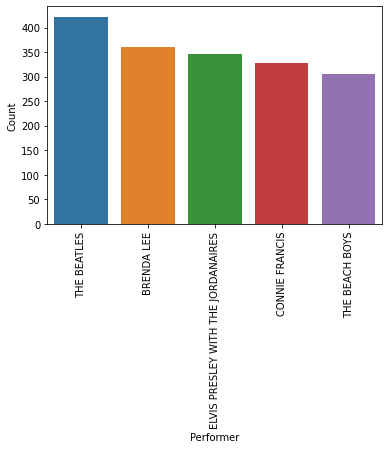

In [36]:
sns.barplot(x='Performer',y='Count',data= top_five)
plt.xticks(rotation= 90)


## 70s

Artists from the seventies with the most charted songs on the Billboard Hot 100.

In [37]:
seventies = hot_100_data[(hot_100_data['Year'] > 1969) & (hot_100_data['Year'] < 1980)]
seventies

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
15,5/1/1971,61,DON'T KNOCK MY LOVE - PT. 1,WILSON PICKETT,1,96.0,61,2,5,1,1971
16,5/8/1971,41,DON'T KNOCK MY LOVE - PT. 1,WILSON PICKETT,1,61.0,41,3,5,8,1971
17,5/15/1971,32,DON'T KNOCK MY LOVE - PT. 1,WILSON PICKETT,1,41.0,32,4,5,15,1971
18,5/22/1971,29,DON'T KNOCK MY LOVE - PT. 1,WILSON PICKETT,1,32.0,29,5,5,22,1971
19,5/29/1971,22,DON'T KNOCK MY LOVE - PT. 1,WILSON PICKETT,1,29.0,22,6,5,29,1971
...,...,...,...,...,...,...,...,...,...,...,...
327879,3/21/1970,22,HEY THERE LONELY GIRL,EDDIE HOLMAN,1,8.0,2,13,3,21,1970
327882,2/27/1971,22,LONELY DAYS,BEE GEES,1,10.0,3,13,2,27,1971
327889,6/7/1975,22,I DON'T LIKE TO SLEEP ALONE,PAUL ANKA WITH ODIA COATES,1,9.0,8,13,6,7,1975
327891,5/21/1977,22,I WANNA GET NEXT TO YOU,ROSE ROYCE,1,10.0,10,13,5,21,1977


In [38]:
artist_count_70s =seventies[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_70s = artist_count_70s.rename(columns = {'Song': 'Count'})
top_five_70s = artist_counts_70s.sort_values(by = 'Count', ascending = False).head(5)
top_five_70s

,Performer,Count
103,BEE GEES,310
298,CHICAGO,283
516,ELTON JOHN,272
261,CARPENTERS,271
520,ELVIS PRESLEY,244


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BEE GEES'),
  Text(1, 0, 'CHICAGO'),
  Text(2, 0, 'ELTON JOHN'),
  Text(3, 0, 'CARPENTERS'),
  Text(4, 0, 'ELVIS PRESLEY')])

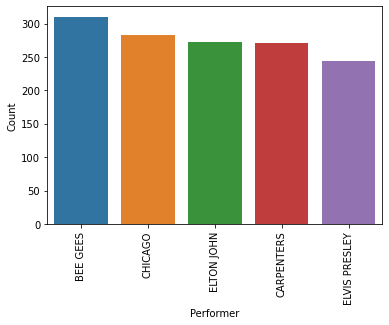

In [39]:
sns.barplot(x='Performer',y='Count',data= top_five_70s)
plt.xticks(rotation= 90)


# 80s

Artists from the eighties with the most charted songs on the Billboard Hot 100.

In [40]:
eighties = hot_100_data[(hot_100_data['Year'] > 1979) & (hot_100_data['Year'] < 1990)]
eighties

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
36,4/4/1981,89,DON'T KNOW MUCH,BILL MEDLEY,1,90.0,89,2,4,4,1981
37,4/11/1981,88,DON'T KNOW MUCH,BILL MEDLEY,1,89.0,88,3,4,11,1981
38,4/18/1981,92,DON'T KNOW MUCH,BILL MEDLEY,1,88.0,88,4,4,18,1981
40,10/7/1989,58,DON'T KNOW MUCH,LINDA RONSTADT (FEATURING AARON NEVILLE),1,72.0,58,2,10,7,1989
41,10/14/1989,53,DON'T KNOW MUCH,LINDA RONSTADT (FEATURING AARON NEVILLE),1,58.0,53,3,10,14,1989
...,...,...,...,...,...,...,...,...,...,...,...
327880,11/4/1989,22,LOVE SONG,THE CURE,1,11.0,2,13,11,4,1989
327881,8/6/1988,22,NEW SENSATION,INXS,1,7.0,3,13,8,6,1988
327884,6/11/1988,22,I DON'T WANT TO LIVE WITHOUT YOU,FOREIGNER,1,8.0,5,13,6,11,1988
327885,8/24/1985,22,GLORY DAYS,BRUCE SPRINGSTEEN,1,13.0,5,13,8,24,1985


In [41]:
artist_count_80s = eighties[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_80s = artist_count_80s.rename(columns = {'Song': 'Count'})
top_five_80s = artist_counts_80s.sort_values(by = 'Count', ascending = False).head(5)
top_five_80s

,Performer,Count
276,DARYL HALL JOHN OATES,342
809,MADONNA,314
126,BILLY JOEL,309
724,KOOL & THE GANG,297
379,ELTON JOHN,279


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'DARYL HALL JOHN OATES'),
  Text(1, 0, 'MADONNA'),
  Text(2, 0, 'BILLY JOEL'),
  Text(3, 0, 'KOOL & THE GANG'),
  Text(4, 0, 'ELTON JOHN')])

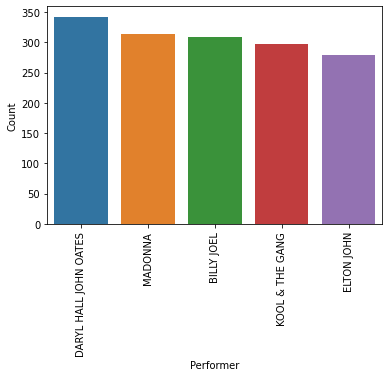

In [42]:
sns.barplot(x='Performer',y='Count',data= top_five_80s)
plt.xticks(rotation= 90)

## 90s

Artists from the nineties with the most charted songs on the Billboard Hot 100.

In [43]:
nineties = hot_100_data[(hot_100_data['Year'] > 1989) & (hot_100_data['Year'] < 2000)]
nineties

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
9,4/26/1997,90,DON'T KEEP WASTING MY TIME,TEDDY PENDERGRASS,1,97.0,90,2,4,26,1997
10,5/3/1997,97,DON'T KEEP WASTING MY TIME,TEDDY PENDERGRASS,1,90.0,90,3,5,3,1997
11,5/10/1997,97,DON'T KEEP WASTING MY TIME,TEDDY PENDERGRASS,1,97.0,90,4,5,10,1997
12,5/17/1997,93,DON'T KEEP WASTING MY TIME,TEDDY PENDERGRASS,1,97.0,90,5,5,17,1997
13,5/24/1997,97,DON'T KEEP WASTING MY TIME,TEDDY PENDERGRASS,1,93.0,90,6,5,24,1997
...,...,...,...,...,...,...,...,...,...,...,...
327864,2/18/1995,21,EVERY DAY OF THE WEEK,JADE,1,21.0,20,13,2,18,1995
327868,4/22/1995,21,HOLD ON,JAMIE WALTERS,1,23.0,21,13,4,22,1995
327871,3/17/1990,21,HERE AND NOW,LUTHER VANDROSS,1,24.0,21,13,3,17,1990
327883,7/28/1990,22,I'LL BE YOUR SHELTER,TAYLOR DAYNE,1,12.0,4,13,7,28,1990


In [44]:
artist_count_90s = nineties[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_90s = artist_count_90s.rename(columns = {'Song': 'Count'})
top_five_90s = artist_counts_90s.sort_values(by = 'Count', ascending = False).head(5)
top_five_90s

,Performer,Count
919,MADONNA,383
929,MARIAH CAREY,369
203,BOYZ II MEN,311
1579,TLC,274
1673,WHITNEY HOUSTON,269


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MADONNA'),
  Text(1, 0, 'MARIAH CAREY'),
  Text(2, 0, 'BOYZ II MEN'),
  Text(3, 0, 'TLC'),
  Text(4, 0, 'WHITNEY HOUSTON')])

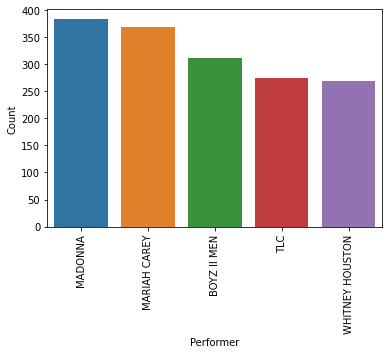

In [45]:
sns.barplot(x='Performer',y='Count',data= top_five_90s)
plt.xticks(rotation= 90)

## 2000s

Artists from the 2000s with the most charted songs on the Billboard Hot 100.

In [46]:
two_thousands = hot_100_data[(hot_100_data['Year'] > 1999) & (hot_100_data['Year'] < 2010) ]
two_thousands

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
88,10/5/2002,73,DON'T KNOW WHY,NORAH JONES,1,78.0,73,2,10,5,2002
89,10/12/2002,72,DON'T KNOW WHY,NORAH JONES,1,73.0,72,3,10,12,2002
90,10/19/2002,72,DON'T KNOW WHY,NORAH JONES,1,72.0,72,4,10,19,2002
91,10/26/2002,72,DON'T KNOW WHY,NORAH JONES,1,72.0,72,5,10,26,2002
92,11/2/2002,69,DON'T KNOW WHY,NORAH JONES,1,72.0,69,6,11,2,2002
...,...,...,...,...,...,...,...,...,...,...,...
327856,3/9/2002,21,NO MORE DRAMA,MARY J. BLIGE,1,17.0,15,13,3,9,2002
327858,9/20/2003,21,IT'S FIVE O'CLOCK SOMEWHERE,ALAN JACKSON & JIMMY BUFFETT,1,17.0,17,13,9,20,2003
327862,8/2/2003,21,INTUITION,JEWEL,1,20.0,20,13,8,2,2003
327863,8/2/2008,21,I LUV YOUR GIRL,THE-DREAM,1,20.0,20,13,8,2,2008


In [47]:
artist_count_2000s = two_thousands[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_2000s = artist_count_2000s.rename(columns = {'Song': 'Count'})
top_five_2000s = artist_counts_2000s.sort_values(by = 'Count', ascending = False).head(5)
top_five_2000s

,Performer,Count
1197,RASCAL FLATTS,426
1458,TOBY KEITH,403
782,KENNY CHESNEY,391
1448,TIM MCGRAW,378
768,KEITH URBAN,359


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RASCAL FLATTS'),
  Text(1, 0, 'TOBY KEITH'),
  Text(2, 0, 'KENNY CHESNEY'),
  Text(3, 0, 'TIM MCGRAW'),
  Text(4, 0, 'KEITH URBAN')])

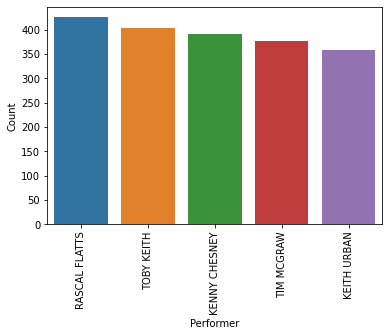

In [48]:
sns.barplot(x='Performer',y='Count',data= top_five_2000s)
plt.xticks(rotation= 90)

# 2010s

Artists from the 2010s with the most charted songs on the Billboard Hot 100.

In [49]:
twenty_tens = hot_100_data[(hot_100_data['Year'] > 2009) & (hot_100_data['Year'] < 2020) ]
twenty_tens

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
497,9/29/2012,17,POUND THE ALARM,NICKI MINAJ,1,19.0,17,8,9,29,2012
513,2/9/2013,17,DAYLIGHT,MAROON 5,1,21.0,17,8,2,9,2013
540,4/13/2019,18,"BREAK UP WITH YOUR GIRLFRIEND, I'M BORED",ARIANA GRANDE,1,14.0,2,8,4,13,2019
541,9/1/2018,18,NONSTOP,DRAKE,1,21.0,2,8,9,1,2018
542,11/2/2013,18,BERZERK,EMINEM,1,16.0,3,8,11,2,2013
...,...,...,...,...,...,...,...,...,...,...,...
327860,8/20/2011,21,KNEE DEEP,ZAC BROWN BAND FEATURING JIMMY BUFFETT,1,19.0,18,13,8,20,2011
327861,10/14/2017,21,MI GENTE,J BALVIN & WILLY WILLIAM FEATURING BEYONCE,1,19.0,19,13,10,14,2017
327869,5/15/2010,21,I MADE IT (CASH MONEY HEROES),"KEVIN RUDOLF FEATURING BIRDMAN, JAY SEAN, & LI...",1,23.0,21,13,5,15,2010
327873,5/19/2018,21,FRIENDS,MARSHMELLO & ANNE-MARIE,1,25.0,21,13,5,19,2018


In [50]:
artist_count_2010s = twenty_tens[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_2010s = artist_count_2010s.rename(columns = {'Song': 'Count'})
top_five_2010s = artist_counts_2010s.sort_values(by = 'Count', ascending = False).head(5)
top_five_2010s

,Performer,Count
433,DRAKE,584
1466,TAYLOR SWIFT,547
997,LUKE BRYAN,405
663,IMAGINE DRAGONS,386
213,BRUNO MARS,358


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'DRAKE'),
  Text(1, 0, 'TAYLOR SWIFT'),
  Text(2, 0, 'LUKE BRYAN'),
  Text(3, 0, 'IMAGINE DRAGONS'),
  Text(4, 0, 'BRUNO MARS')])

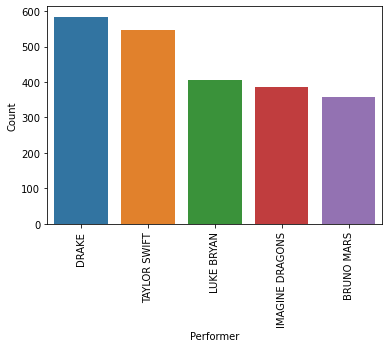

In [51]:
sns.barplot(x='Performer',y='Count',data= top_five_2010s)
plt.xticks(rotation= 90)

## 2020s

Artists from the 2020s with the most charted songs on the Billboard Hot 100.

In [52]:
twenties = hot_100_data[(hot_100_data['Year'] == 2020)]
twenties

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart,Month,Day,Year
1972,9/12/2020,19,COME & GO,JUICE WRLD X MARSHMELLO,1,19.0,2,8,9,12,2020
2066,4/11/2020,19,BLUEBERRY FAYGO,LIL MOSEY,1,37.0,19,8,4,11,2020
2163,2/1/2020,21,BLINDING LIGHTS,THE WEEKND,1,32.0,11,8,2,1,2020
2277,8/29/2020,22,RAGS2RICHES,ROD WAVE FEATURING ATR SON SON,1,12.0,12,8,8,29,2020
3579,1/4/2020,77,TAKE WHAT YOU WANT,POST MALONE FEATURING OZZY OSBOURNE & TRAVIS S...,1,76.0,8,16,1,4,2020
...,...,...,...,...,...,...,...,...,...,...,...
327403,2/29/2020,14,HEARTLESS,THE WEEKND,1,17.0,1,13,2,29,2020
327404,11/28/2020,14,DYNAMITE,BTS,1,17.0,1,13,11,28,2020
327472,10/10/2020,15,FOR THE NIGHT,POP SMOKE FEATURING LIL BABY & DABABY,1,15.0,6,13,10,10,2020
327779,11/14/2020,19,KINGS & QUEENS,AVA MAX,1,22.0,19,13,11,14,2020


In [53]:
artist_count_2020s = twenties[['Performer', 'Song']].groupby(['Performer'], as_index = False).count()
artist_counts_2020s = artist_count_2020s.rename(columns = {'Song': 'Count'})
top_five_2020s = artist_counts_2020s.sort_values(by = 'Count', ascending = False).head(5)
top_five_2020s

,Performer,Count
304,THE WEEKND,91
121,HARRY STYLES,86
186,LIL BABY,85
230,MORGAN WALLEN,78
92,DUA LIPA,76


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'THE WEEKND'),
  Text(1, 0, 'HARRY STYLES'),
  Text(2, 0, 'LIL BABY'),
  Text(3, 0, 'MORGAN WALLEN'),
  Text(4, 0, 'DUA LIPA')])

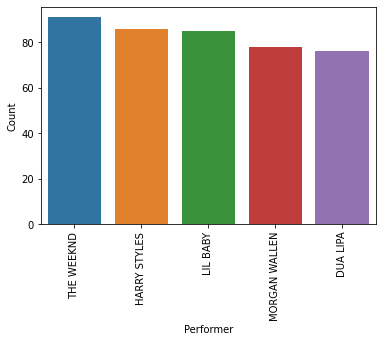

In [54]:
sns.barplot(x='Performer',y='Count',data= top_five_2020s)
plt.xticks(rotation= 90)

## Artist with the most number one hits on the Billboard Hot 100

In [55]:
number_ones = hot_100[hot_100['Week Position'] == 1]
one_hits = number_ones[['Performer', 'Week Position', 'Song']].groupby(['Performer','Week Position'], as_index = False).count()
top_one_hit_artists = one_hits.rename(columns = {'Song': 'Count'})
top_five_artists = top_one_hit_artists.sort_values(by = 'Count', ascending = False).head(5)
top_five_artists

,Performer,Week Position,Count
385,Mariah Carey,1,65
614,The Beatles,1,54
94,Boyz II Men,1,34
382,Madonna,1,32
726,Whitney Houston,1,31


## Most charted song on the billboard hot 100

In [57]:
charted_songs = hot_100_data[['Performer', 'Week Position', 'Song']].groupby(['Performer', 'Song'], as_index = False).count()
top_songs = charted_songs.rename(columns = {'Week Position': 'Count'})
top_five_songs = top_songs.sort_values(by = 'Count', ascending = False).head(5)
top_five_songs

,Performer,Song,Count
10093,IMAGINE DRAGONS,RADIOACTIVE,85
1359,AWOLNATION,SAIL,77
10832,JASON MRAZ,I'M YOURS,75
24645,THE WEEKND,BLINDING LIGHTS,74
13499,LEANN RIMES,HOW DO I LIVE,68


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'IMAGINE DRAGONS'),
  Text(1, 0, 'AWOLNATION'),
  Text(2, 0, 'JASON MRAZ'),
  Text(3, 0, 'THE WEEKND'),
  Text(4, 0, 'LEANN RIMES')])

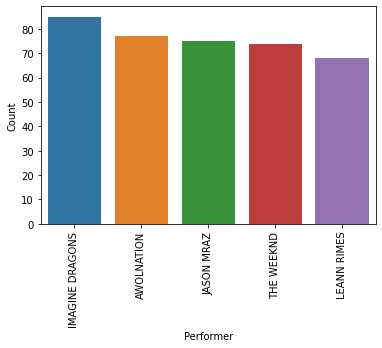

In [58]:
sns.barplot(x='Performer',y='Count',data= top_five_songs)
plt.xticks(rotation= 90)

# Does having featured artists in songs correlate to ranking success?

In [59]:
hot_100_data['Features'] = (hot_100_data['Performer'].str.contains('&')) | (hot_100_data['Performer'].str.contains('Featuring')) | (hot_100['Performer'].str.contains('featuring'))
no_features = hot_100_data[hot_100_data['Features'] == False]
group_songs = no_features[['Song', 'Week Position']].groupby(['Song'], as_index = False).mean('Position')
top_songs = group_songs.rename(columns = {'Week Position': 'Average Position (No Features)'})
top_songs

/var/folders/1s/yb20syhd2ll9v1fz6jzdrt040000gn/T/ipykernel_24820/2303602597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_100_data['Features'] = (hot_100_data['Performer'].str.contains('&')) | (hot_100_data['Performer'].str.contains('Featuring')) | (hot_100['Performer'].str.contains('featuring'))


,Song,Average Position (No Features)
0,"""B"" GIRLS",70.071429
1,"""CHERRY CHERRY"" FROM HOT AUGUST NIGHT",43.888889
2,"""HAVING A PARTY"" MEDLEY",73.125000
3,"""JOY"" PT. I",38.500000
4,"""ROOTS"" MEDLEY",67.833333
...,...,...
20836,ZOMBIE,79.187500
20837,ZOOM,72.818182
20838,ZUNGA ZENG,70.714286
20839,[FREAK] AND U KNOW IT,78.833333


In [68]:
features = hot_100_data[hot_100_data['Features'] == True]
group_songs = features[['Song', 'Week Position']].groupby(['Song'], as_index = False).mean('Position')
top_songs_f = group_songs.rename(columns = {'Week Position': 'Average Position (Features)'})
top_songs_f

bigdata = pd.concat([top_songs, top_songs_f], ignore_index=True, sort=False)
bigdata

,Song,Average Position (No Features),Average Position (Features)
0,"""B"" GIRLS",70.071429,NaN
1,"""CHERRY CHERRY"" FROM HOT AUGUST NIGHT",43.888889,NaN
2,"""HAVING A PARTY"" MEDLEY",73.125000,NaN
3,"""JOY"" PT. I",38.500000,NaN
4,"""ROOTS"" MEDLEY",67.833333,NaN
...,...,...,...
22825,YOUR PRECIOUS LOVE,NaN,21.583333
22826,YOUR SMILE,NaN,73.200000
22827,ZAZUEIRA (ZA-ZOO-WHER-A),NaN,79.000000
22828,ZEZE,NaN,16.833333


<AxesSubplot:>

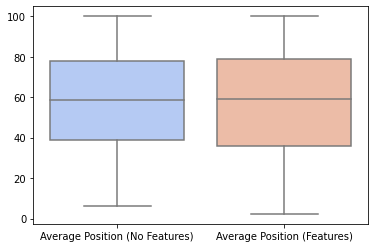

In [69]:
sns.boxplot(data = bigdata, palette="coolwarm", order=['Average Position (No Features)', 'Average Position (Features)'])

## Do certain words in songs determine ranking success?

In [71]:
split_songs = (hot_100_data['Song'].str.split(" "))
data = pd.DataFrame({'Words': split_songs, 'nums': range(len(split_songs))})
words_songs = data.apply(lambda x: pd.Series(x['Words']),axis=1).stack().reset_index(level=1, drop=True)
data_2 = pd.DataFrame({'Words': words_songs, 'nums': range(len(words_songs))})
word_groups = data_2.groupby(['Words'], as_index = False).count()
most_common_words = word_groups.sort_values(by = 'nums', ascending = False).head(10)
most_common_words

,Words,nums
9610,THE,35703
10836,YOU,30780
5167,I,22804
6084,LOVE,21610
6371,ME,18972
1046,A,15831
9785,TO,15135
7024,OF,13314
6755,MY,13201
5237,IN,12391


In [72]:
contain_pop_words = hot_100_data.loc[hot_100_data['Song'].isin(most_common_words['Words'])]

words_ranks = contain_pop_words[['Song', 'Week Position']].groupby(['Song'], as_index = False).mean('Position')
words_ranks
word_rank = words_ranks.rename(columns = {'Week Position': 'Average Position'})
word_rank

,Song,Average Position
0,I,62.384615
1,LOVE,41.666667
2,YOU,56.727811


<AxesSubplot:xlabel='Song', ylabel='Average Position'>

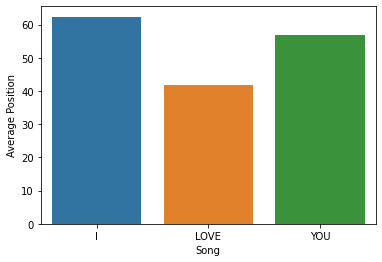

In [73]:
sns.barplot(x = 'Song', y = 'Average Position', data = word_rank)